<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.951 · Tipologia i cicle de vida de les dades · PRÀCTICA 2
</p>
<p style="margin: 0; text-align:right;">2021-2 · Máster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRÀCTICA 2
En aquesta pràctica s'elabora un cas pràctic orientat a aprendre a identificar les dades rellevants per un projecte analític i usar les eines ETL i anàlisis de les mateixes.

## 1. DESCRIPCIÓ DEL DATASET


El projecte que presentem es basa en l'estudi d'un dataset amb un recull de les propietats físicoquímiques de diferents vins portuguesos, de la varietat "Vinho Verde", així com la seva evaluació de qualitat, basada en la valoració d'experts [Cortez det al., 2009].  

La certificació d'un vi es sovint avaluada arrel de l'anàlisi de les propietats tant fisicoquímiques, derivades d'analítiques, com de les propietats organolèptiques. Aquestes últimes fan referència als resultats sensorials d'un conjunt d'experts. Cal remarcar que, les relacions entre  les propietats fisicoquímiques i organolèptiques són complexes, i encara són fruit d'estudi ja que no es té prou coneixement d'aquestes.  

És per això que, aquest joc de dades cobra una especial importància, ja que ens permetrà tractar d'obtenir coneixement sobre aquestes relacions, i, fins i tot, predir la qualitat d'un vi, en funció de les seves analítiques.  

Un cop completat l'estudi, caldrà però, donar resposta a la següent pregunta: és prou explicatiu o intuitiu el model com per poder ser aplicat en procés?  

Una de les dificultats a l'hora de modelar o predir, consisteix a traduir el resultat de la modelització a llenguatge de negoci. Probablement, un model molt precís però molt abstracte alhora, serà difícil d'aplicar en entorns on els usuaris de negoci clarament no són experts.  

Per tant, està clar que l'explicabilitat i representació dels resultats és un punt clau, que també pot fer que haguem de tornar a pasos anteriors. I es que, el cicle de vida d'un projecte de dades no deixa de ser un procés iteratiu.

## 1.1. Preparació de l'entorn

El primer que trobarem en aquest notebook serà una secció dedicada a la importació de totes les llibreries necessàries per dur a terme els anàlisis requerits per a l'estudi, modelització i avaluació del joc de dades.

In [ ]:
# En primer lloc, importarem el mòdul de Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# I assignarem com a directori de treball la carpeta adient, per a poder fer la càrrega i guardat del joc de dades.
%cd /content/drive/MyDrive/TiCVD/PRA2

/content/drive/MyDrive/TiCVD/PRA2


In [ ]:
import warnings

import numpy as np
import pandas as pd
from scipy import stats
import math 

import sklearn
import seaborn as sns
from sklearn import cluster           
from sklearn import decomposition  
from statistics import mode

from io import StringIO
from IPython.display import Image
from matplotlib.colors import ListedColormap

import pydotplus

from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import statsmodels.api as sm
import pylab

import keras
from keras import layers, optimizers, regularizers
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential

%matplotlib inline

## 2. INTEGRACIÓ I SELECIÓ DE LES DADES D'INTERÈS

Abans d'entrar en aplicar algoritmes, és necessari entendre el joc de dades del que disposem, i com ens pot ajudar a donar resposta a la pregunta del treball.  

Aquí és on entra aquest primer anàlisi exploratori, amb el que voldrem realitzar la selecció de les dades que ens és més d'interès. Així podrem analitzar-les amb un propòsit i amb unes hipòtesis preestablertes.

Per fer això, primer haurem de carregar les dades del dataset que podem descarregar del següent link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download&select=winequality-red.csv

In [ ]:
wine = pd.read_csv("winequality-red.csv")

In [ ]:
# Per comprovar que la càrrega ha estat correcta, i poder tenir una primera vista de com són les dades
# podem mostrar tant les 5 primeres files del dataset.
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Comencem a posar-li més cara i ulls a la informació de la que disposem.

In [ ]:
print("El dataset conté la següent informació:\n")
print("Shape:\n\t", wine.shape)
print("\nInformació del dataset:\n")
print(wine.info())

El dataset conté la següent informació:

Shape:
	 (1599, 12)

Informació del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


El dataset conté **12** variables (11 són tipus float (amb decimals) i la variable *quality* de tipus integer). En total, hi ha **1599** registres.  
Cada variable representa una de les propietats fisicoquímiques a partir de les qual s'avalua la qualitat del vi, de manera analítica. Vegem què representa cada camp:  
1. **fixed acidity**: Concentració d'àcid tartàric, en g(tartaric acid)/dm^3    
2. **volatile acidity**: Concentració d'àcid acètic, en g(acetic acid)/dm^3   
3. **citric acid**: Concentració d'àcid cítric, en g/dm^3   
4. **residual sugar**: Concentració de sucres residuals, en g/dm^3 
5. **chlorides**: Concentració de clorurs, a partir de la concentració de clorur de sodi, en g(sodium chloride)/dm^3    
6. **free sulfur dioxide**: Concentració de diòxid de sofre lliure, en mg/dm^3   
7. **total sulfur dioxide**: Concentració total de diòxid de sofre, en mg/dm^3   
8. **density**: Densitat del vi, en g/cm^3   
9. **pH**: Acidesa de la mostra, entre 0 i 14   
10. **sulphates**: Concentració de sulfats, en g(potassium sulphate)/dm^3   
11. **alcohol**: Percentatge d'alcohol en volum, en vol.%   
12. **quality**: Puntuació sensorial, entre 0 i 10     


Com hem comentat incialment, el propòsit que seguim a través de l'anàlisi que volem realitzar, és determinar quines variables tenen més o menys pes en la qualitat del vi, i arribar a ser capaços de fer-ne prediccions a partir d'aquetses propietats rellevants.  

Així doncs, *quality* serà la variable output, mentre que les variables *fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, i alcohol* seràn les variables independents. D'aquesta manera ens queda un anàlisi de les variables independents ric, tant en estudi de correlacions, estudi de pesos, i més estudis i anàlisis que es poden realitzar.

Aquest estudi previ ens permetrà poder realitzar un futur anàlisi predictiu de la variable *quality*.

Com a selecció de dades, primerament utilitzarem totes les variables i totes les dades disponibles, però alhora de realitzar l'estudi predictiu (construcció i avaluació de models), separarem les dades en *train i test*.

# 3. NETEJA DE LES DADES

Per tal de poder fer un estudi estadísticament significatiu, caldrà tractar tots aquells valors atípics que poguem trobar al joc de dades. En aquesta fase del projecte, és quan s'estudia si el dataset conté valors perduts, si hi ha errors de format en quant a la conversió de decimals, si cal arreglar algún camp de tipus text, etc.

També serà important veure la distribució de les dades per entendre si hi ha mesures que puguin estar fora de rang, el que es coneix com outliers, que també caldrà tractar per tal de reduir els biaixos que puguin introduir durant l'anàlisi.

## 3.1. Estudi de valors buits

En aquest apartat el que analitzarem és si existeix valors NaN o valors nulls, com també analitzarem els outliers que poden existir a cada una de les variables que tenim al nostre dataset.
<br />En cas que existeixin, tan valors nulls, com outliers, realitzarem el tractament que trobem més addient.

In [ ]:
# Comprovem si dins del dataset existeix, en general, algun valor nul
check_for_nan_wine = wine.isnull().any().any()
print("Existeix algun valor null al nostre Wine DatFrame?",check_for_nan_wine)

Existeix algun valor null al nostre Wine DatFrame? False


Com observem, ja descartem l'existència de valors nulls al nostre dataset. Si s'hagués donat la situació contrària, es pot realitzar l'anàlisi per variable:

In [ ]:
# Amb una crida menys al mètode any(), podem obtenir la informació per a cada variable del dataset
nanWine = wine.isnull().any()
print("Existeix algun valor null per columna?", "\n\n", nanWine)

Existeix algun valor null per columna? 

 fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


## 3.1. Estudi de valors atípics (outliers)

Per fer l'estudi, primer mirem quina distribució segueixen i com estan distribuides les dades.

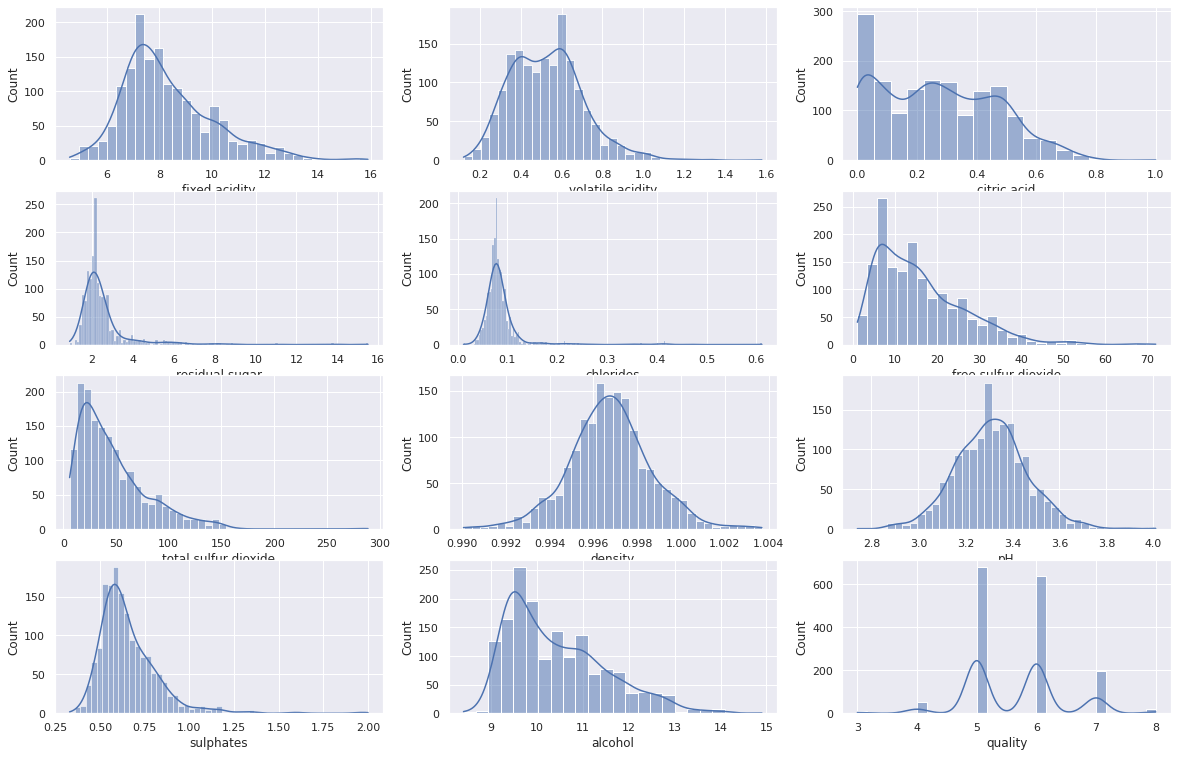

In [ ]:
# Amb aquesta comanda ocultarem els diversos missatges d'avertència i suggerència
# que mostren les crides a les comandes gràfiques.
warnings.filterwarnings('ignore')

# A continuació, es representen les distribucions per a cada variable.
# En aquest bloc de comandes, comencem defininint quina serà la mida de cada 
# gràfic.
plt.figure(figsize=(20, 13))
# Després dividim l'espai en subgràfics, per tal de poder mostrar-los
# en estructura de graella amb el mètode subplot.

# La comanda distplot de la llibreria Seaborn, ens permet obtenir l'histograma,
# així com la corva de densitat de probabilitat activant el paràmetre "kde"
# Aquesta corva ens ajudarà, visualment, a tenir una idea de quina
# distribució segueixen les variables.

# Grafiquem per a fixed acidity
plt.subplot(4, 3, 1)
sns.histplot(wine['fixed acidity'], kde = True)
# Grafiquem per a volatile acidity
plt.subplot(4, 3, 2)
sns.histplot(wine['volatile acidity'], kde = True)
# Grafiquem per a citric acid
plt.subplot(4, 3, 3)
sns.histplot(wine['citric acid'], kde = True)
# Grafiquem per a residual sugar
plt.subplot(4, 3, 4)
sns.histplot(wine['residual sugar'], kde = True)
# Grafiquem per a chlorides
plt.subplot(4, 3, 5)
sns.histplot(wine['chlorides'], kde = True)
# Grafiquem per a free sulfur dioxide
plt.subplot(4, 3, 6)
sns.histplot(wine['free sulfur dioxide'], kde = True)
# Grafiquem per a total sulfur dioxide
plt.subplot(4, 3, 7)
sns.histplot(wine['total sulfur dioxide'], kde = True)
# Grafiquem per a density
plt.subplot(4, 3, 8)
sns.histplot(wine['density'], kde = True)
# Grafiquem per a pH
plt.subplot(4, 3, 9)
sns.histplot(wine['pH'], kde = True)
# Grafiquem per a sulphates
plt.subplot(4, 3, 10)
sns.histplot(wine['sulphates'], kde = True)
# Grafiquem per a alcohol
plt.subplot(4, 3, 11)
sns.histplot(wine['alcohol'], kde = True)
# Grafiquem per a quality
plt.subplot(4, 3, 12)
sns.histplot(wine['quality'], kde = True)
# Mostrem tots els gràfics
plt.show()

D'entrada, amb aquests gràfics podem treure les següents conclusions:
1. Si mirem la distribució de la variable objectiu, *quality*, cal destacar que no disposem d'un joc de dades prou balancejat. La inmensa majoria de mostres es troben dins la zona intermitja de puntuació en quant a la qualitat del vi. Concretament, entre els valors 5 i 6. Per tant, cal remaracar que el nostre model serà molt bo fent prediccions en aquesta zona, però no serà capaç de modelar vins de inferior qualitat ni de superior qualitat amb tant d'èxit.
2. En moltes de les variables podem obvservar que hi ha un gran efecte de cues cap a la dreta. Serà important, llavors, realitzar un bon estudi sobre quins valors atípics existeixen al joc de dades.

Ja que no disposem de dades adicionals per a la mateixa població per poder mitigar els efectes del punt 1, continuarem amb un estudi més detallat dels valors atípics per a poder actuar sobre el punt 2. A continuació, ens ajudarem de gràfics de caixes (boxplots), per a facilitar la detecció dels valors atípics.

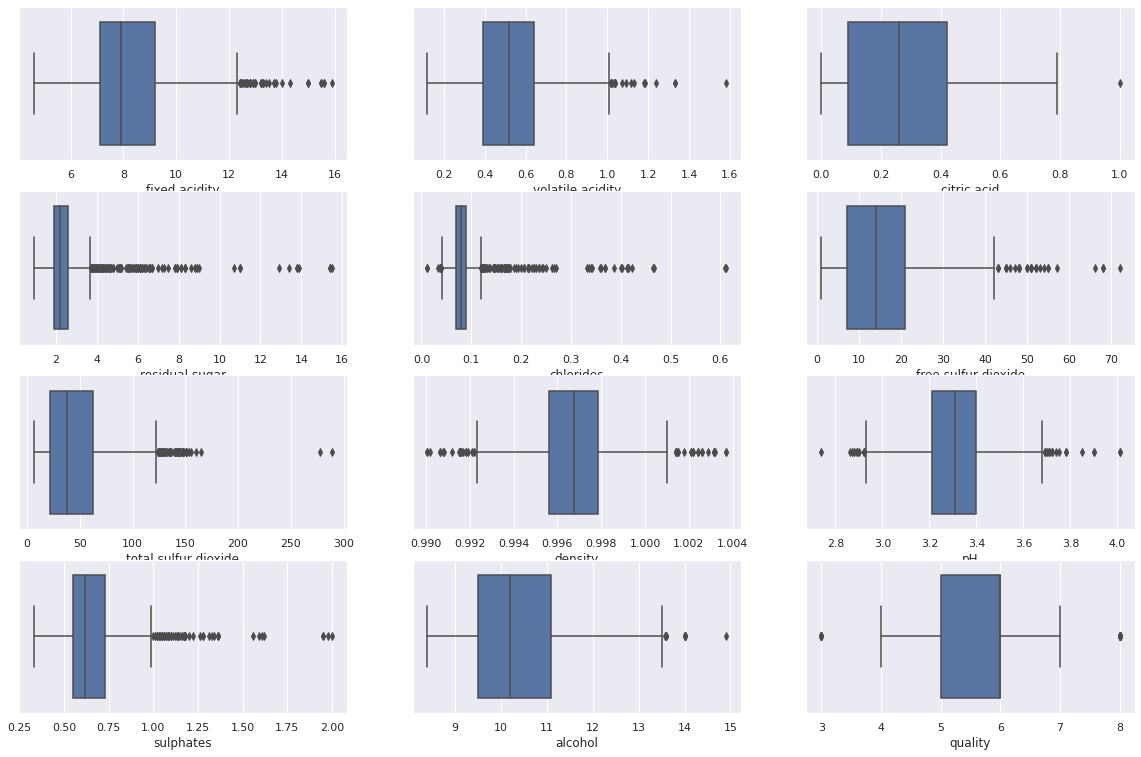

In [ ]:
# Ignorem missatges d'advertència
warnings.filterwarnings('ignore')

# En aquest punt, l'estratègia és la mateixa per a cada variable.
# Representem el boxplot de cadascuna en un subplot, per poder veure-ho de forma
# estructurada

plt.figure(figsize=(20, 13))
# Grafiquem per a fixed acidity
plt.subplot(4, 3, 1)
sns.boxplot(wine['fixed acidity'])
# Grafiquem per a volatile acidity
plt.subplot(4, 3, 2)
sns.boxplot(wine['volatile acidity'])
# Grafiquem per a citric acid
plt.subplot(4, 3, 3)
sns.boxplot(wine['citric acid'])
# Grafiquem per a residual sugar
plt.subplot(4, 3, 4)
sns.boxplot(wine['residual sugar'])
# Grafiquem per a chlorides
plt.subplot(4, 3, 5)
sns.boxplot(wine['chlorides'])
# Grafiquem per a free sulfur dioxide
plt.subplot(4, 3, 6)
sns.boxplot(wine['free sulfur dioxide'])
# Grafiquem per a total sulfur dioxide
plt.subplot(4, 3, 7)
sns.boxplot(wine['total sulfur dioxide'])
# Grafiquem per a density
plt.subplot(4, 3, 8)
sns.boxplot(wine['density'])
# Grafiquem per a pH
plt.subplot(4, 3, 9)
sns.boxplot(wine['pH'])
# Grafiquem per a sulphates
plt.subplot(4, 3, 10)
sns.boxplot(wine['sulphates'])
# Grafiquem per a alcohol
plt.subplot(4, 3, 11)
sns.boxplot(wine['alcohol'])
# Grafiquem per a quality
plt.subplot(4, 3, 12)
sns.boxplot(wine['quality'])
plt.show()

Amb aquests gràfics, podem observar clarament com hi ha algunes variables que tenen una gran presència de valors atípics per sobre. 
Els casos més destacats són les variables *residual sugar*, *chlorides*, *total sulphur dioxide* i *sulphates*.
A continuació mostrem aquest mateix anàlisi descriptiu en forma de taula numèrica per poder tenir una idea més quantitativa de quines situacions trobem.

In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Com podem observar de l'anàlisi descriptiu numèric, per a la variable *residual sugar* estem parlant de que el valor màxim es troba aproximadament 6 vegades per sobre de la mitjana, i també del percentil 75%, per a la variable *chlorides* estariem parlant de 10 vegades per sobre i, per a *total sulfur dioxide* de 5 vegades per sobre.

A continuació ens disposem a tractar-los. Com entenem que les dades estan correctament extretes, el mètode per càlcular quins són els valors a substituïr és la mitjana +- 1.5 cops el IQR.


In [ ]:
# Mostrem a continuació quins serien llavors, els valors de tall que estarien dins el rang de 1.5 vegades per sobre i per sota de la mitjana.
for i in wine:
  print("El valor més alt tingut en compte per la variable {} és {}i,\n el valor més baix és {}\n".format(i, 
                                                                                                        wine[i].mean()+1.5*(wine[i].quantile(.75)-wine[i].quantile(.25)), 
                                                                                                        wine[i].mean()-1.5*(wine[i].quantile(.75)-wine[i].quantile(.25))))

El valor més alt tingut en compte per la variable fixed acidity és 11.469637273295838i,
 el valor més baix és 5.169637273295838

El valor més alt tingut en compte per la variable volatile acidity és 0.9028205128205131i,
 el valor més baix és 0.15282051282051312

El valor més alt tingut en compte per la variable citric acid és 0.7659756097560964i,
 el valor més baix és -0.22402439024390353

El valor més alt tingut en compte per la variable residual sugar és 3.588805503439652i,
 el valor més baix és 1.4888055034396515

El valor més alt tingut en compte per la variable chlorides és 0.11746654158849255i,
 el valor més baix és 0.057466541588492584

El valor més alt tingut en compte per la variable free sulfur dioxide és 36.87492182614134i,
 el valor més baix és -5.125078173858661

El valor més alt tingut en compte per la variable total sulfur dioxide és 106.4677923702314i,
 el valor més baix és -13.532207629768607

El valor més alt tingut en compte per la variable density és 1.0000991791744

Un cop estudiats quins són els límits per a considerar quins són els valors atípics, procedirem a regularitzar-los fent substitució per la mediana de la variable. Aquest mètode d'imputació és interessant ja que moltes de les variables no estàn centrades, si no que hi ha un efecte de cues en la distribució.

In [ ]:
# Per fer el tall per el quartil superior, calculem els límits superiors i inferiors de les variables.
upper_fixed_acidity = wine['fixed acidity'].mean()+1.5*(wine['fixed acidity'].quantile(.75)-wine['fixed acidity'].quantile(.25))
upper_volatile_acidity = wine['volatile acidity'].mean()+1.5*(wine['volatile acidity'].quantile(.75)-wine['volatile acidity'].quantile(.25))
upper_citric_acid = wine['citric acid'].mean()+1.5*(wine['citric acid'].quantile(.75)-wine['citric acid'].quantile(.25))
upper_residual_sugar = wine['residual sugar'].mean()+1.5*(wine['residual sugar'].quantile(.75)-wine['residual sugar'].quantile(.25))
upper_chlorides = wine['chlorides'].mean()+1.5*(wine['chlorides'].quantile(.75)-wine['chlorides'].quantile(.25))
upper_free_sulfur_dioxide = wine['free sulfur dioxide'].mean()+1.5*(wine['free sulfur dioxide'].quantile(.75)-wine['free sulfur dioxide'].quantile(.25))
upper_total_sulfur_dioxide = wine['total sulfur dioxide'].mean()+1.5*(wine['total sulfur dioxide'].quantile(.75)-wine['total sulfur dioxide'].quantile(.25))
upper_density = wine['density'].mean()+1.5*(wine['density'].quantile(.75)-wine['density'].quantile(.25))
upper_pH = wine['pH'].mean()+1.5*(wine['pH'].quantile(.75)-wine['pH'].quantile(.25))
upper_sulphates = wine['sulphates'].mean()+1.5*(wine['sulphates'].quantile(.75)-wine['sulphates'].quantile(.25))
upper_alcohol = wine['alcohol'].mean()+1.5*(wine['alcohol'].quantile(.75)-wine['alcohol'].quantile(.25))

# Per tractar els valors atípics per sota, ens ajudem dels boxplot anteriors per determinar quines variables en tenen per sota.
lower_residual_sugar = wine['residual sugar'].mean()-1.5*(wine['residual sugar'].quantile(.75)-wine['residual sugar'].quantile(.25))
lower_chlorides = wine['chlorides'].mean()-1.5*(wine['chlorides'].quantile(.75)-wine['chlorides'].quantile(.25))
lower_density = wine['density'].mean()-1.5*(wine['density'].quantile(.75)-wine['density'].quantile(.25))
lower_pH = wine['pH'].mean()-1.5*(wine['pH'].quantile(.75)-wine['pH'].quantile(.25))
lower_sulphates = wine['sulphates'].mean()-1.5*(wine['sulphates'].quantile(.75)-wine['sulphates'].quantile(.25))


In [ ]:
# A continuació, procedim a fer les substitucions dels valors atípics
# Tots aquells que excedeixin el límit inferior o superior, els substituim per
# la mediana de la variable.

for idx, i in enumerate(wine['fixed acidity']):
    if i > upper_fixed_acidity:
        wine['fixed acidity'][idx] = wine['fixed acidity'].median()

for idx, i in enumerate(wine['volatile acidity']):
    if i > upper_volatile_acidity:
        wine['volatile acidity'][idx] = wine['volatile acidity'].median()

for idx, i in enumerate(wine['citric acid']):
    if i > upper_citric_acid:
        wine['citric acid'][idx] = wine['citric acid'].median()

for idx, i in enumerate(wine['residual sugar']):
    if i > upper_residual_sugar:
        wine['residual sugar'][idx] = wine['residual sugar'].median()
    elif i < lower_residual_sugar:
        wine['residual sugar'][idx] = wine['residual sugar'].median()

for idx, i in enumerate(wine['chlorides']):
    if i > upper_chlorides:
        wine['chlorides'][idx] = wine['chlorides'].median()
    elif i < lower_chlorides:
        wine['chlorides'][idx] = wine['chlorides'].median()

for idx, i in enumerate(wine['free sulfur dioxide']):
    if i > upper_free_sulfur_dioxide:
        wine['free sulfur dioxide'][idx] = wine['free sulfur dioxide'].median()

for idx, i in enumerate(wine['total sulfur dioxide']):
    if i > upper_total_sulfur_dioxide:
        wine['total sulfur dioxide'][idx] = wine['total sulfur dioxide'].median()

for idx, i in enumerate(wine['density']):
    if i > upper_density:
        wine['density'][idx] = wine['density'].median()
    elif i < lower_density:
        wine['density'][idx] = wine['density'].median()

for idx, i in enumerate(wine['pH']):
    if i > upper_pH:
        wine['pH'][idx] = wine['pH'].median()
    elif i < lower_pH:
        wine['pH'][idx] = wine['pH'].median()

for idx, i in enumerate(wine['sulphates']):
    if i > upper_sulphates:
        wine['sulphates'][idx] = wine['sulphates'].median()
    elif i < lower_sulphates:
        wine['sulphates'][idx] = wine['sulphates'].median()

for idx, i in enumerate(wine['alcohol']):
    if i > upper_alcohol:
        wine['alcohol'][idx] = wine['alcohol'].median()

Per comprobar que tot ha sortit com hauria de sortir, tornem a executar la comanda dels boxplot:

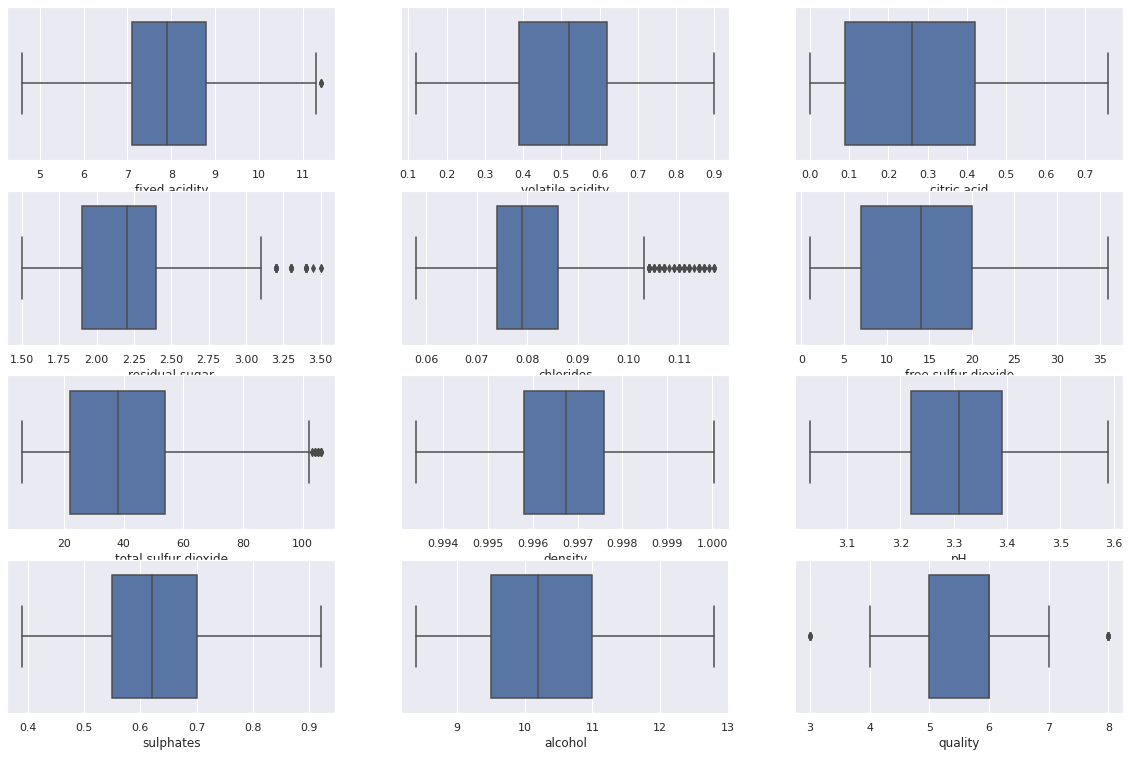

In [ ]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(20, 13))
# Grafiquem per a fixed acidity
plt.subplot(4, 3, 1)
sns.boxplot(wine['fixed acidity'])
# Grafiquem per a volatile acidity
plt.subplot(4, 3, 2)
sns.boxplot(wine['volatile acidity'])
# Grafiquem per a citric acid
plt.subplot(4, 3, 3)
sns.boxplot(wine['citric acid'])
# Grafiquem per a residual sugar
plt.subplot(4, 3, 4)
sns.boxplot(wine['residual sugar'])
# Grafiquem per a chlorides
plt.subplot(4, 3, 5)
sns.boxplot(wine['chlorides'])
# Grafiquem per a free sulfur dioxide
plt.subplot(4, 3, 6)
sns.boxplot(wine['free sulfur dioxide'])
# Grafiquem per a total sulfur dioxide
plt.subplot(4, 3, 7)
sns.boxplot(wine['total sulfur dioxide'])
# Grafiquem per a density
plt.subplot(4, 3, 8)
sns.boxplot(wine['density'])
# Grafiquem per a pH
plt.subplot(4, 3, 9)
sns.boxplot(wine['pH'])
# Grafiquem per a sulphates
plt.subplot(4, 3, 10)
sns.boxplot(wine['sulphates'])
# Grafiquem per a alcohol
plt.subplot(4, 3, 11)
sns.boxplot(wine['alcohol'])
# Grafiquem per a quality
plt.subplot(4, 3, 12)
sns.boxplot(wine['quality'])
plt.show()

Com podem observar en els boxplots, hem aconseguit reduir la influència d'aquells valors massa extrems. Cal remarcar que encara queden alguns valors que s'identifiquen com a outliers en els boxplots, però els mantindrem per no perdre més informació experimental.

Observem com les dades queden més normalitzades a través de les següents gràfiques:

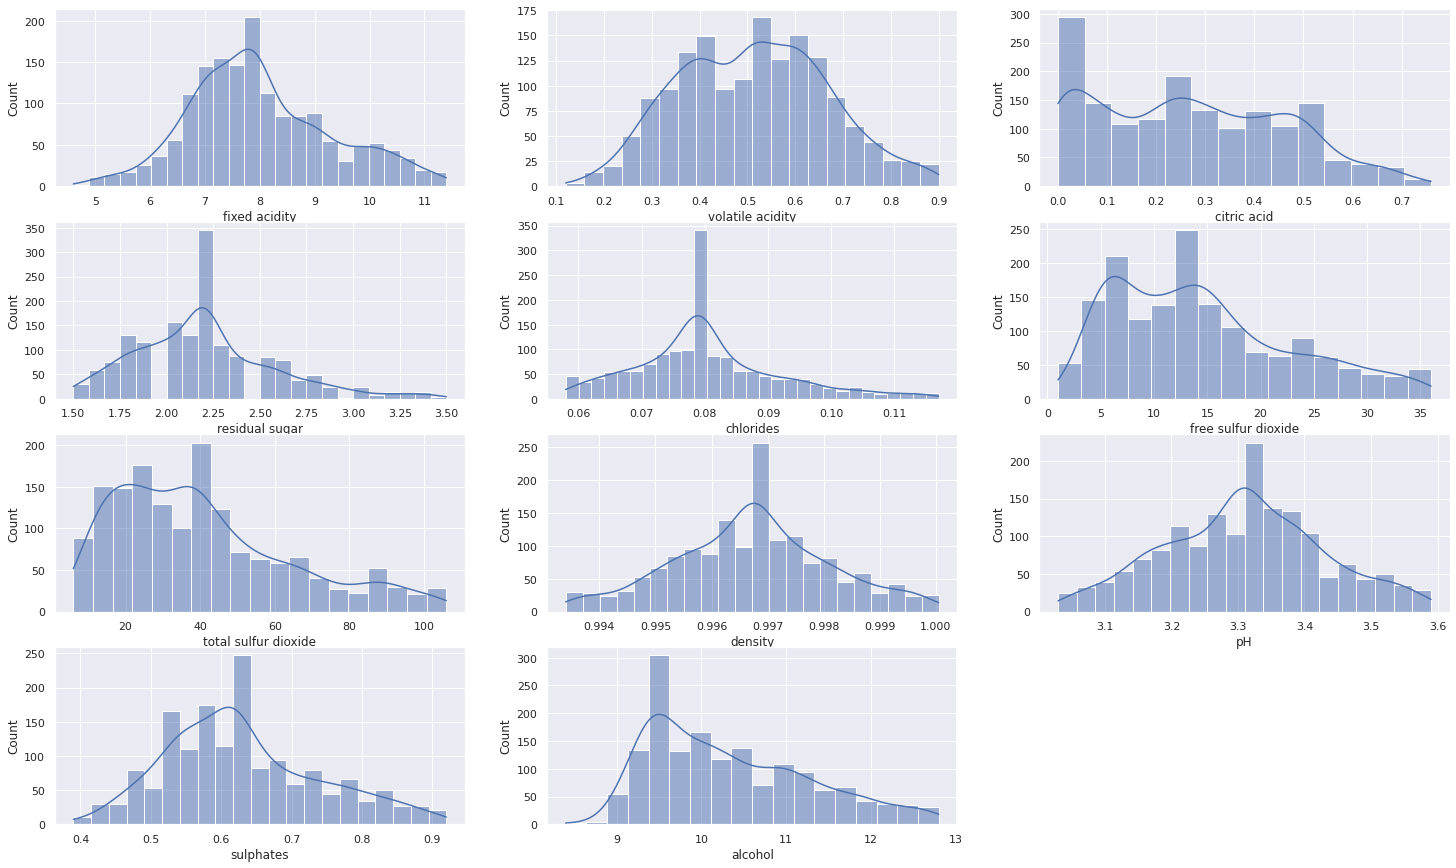

In [ ]:
warnings.filterwarnings('ignore')
# Representem una altra vegada les gràfiques de distribució
# un cop tractats els valors extrems.

plt.figure(figsize=(25, 15))
# Grafiquem per a fixed acidity
plt.subplot(4, 3, 1)
sns.histplot(wine['fixed acidity'], kde = True)
# Grafiquem per a volatile acidity
plt.subplot(4, 3, 2)
sns.histplot(wine['volatile acidity'], kde = True)
# Grafiquem per a citric acid
plt.subplot(4, 3, 3)
sns.histplot(wine['citric acid'], kde = True)
# Grafiquem per a residual sugar
plt.subplot(4, 3, 4)
sns.histplot(wine['residual sugar'], kde = True)
# Grafiquem per a chlorides
plt.subplot(4, 3, 5)
sns.histplot(wine['chlorides'], kde = True)
# Grafiquem per a free sulfur dioxide
plt.subplot(4, 3, 6)
sns.histplot(wine['free sulfur dioxide'], kde = True)
# Grafiquem per a total sulfur dioxide
plt.subplot(4, 3, 7)
sns.histplot(wine['total sulfur dioxide'], kde = True)
# Grafiquem per a density
plt.subplot(4, 3, 8)
sns.histplot(wine['density'], kde = True)
# Grafiquem per a pH
plt.subplot(4, 3, 9)
sns.histplot(wine['pH'], kde = True)
# Grafiquem per a sulphates
plt.subplot(4, 3, 10)
sns.histplot(wine['sulphates'], kde = True)
# Grafiquem per a alcohol
plt.subplot(4, 3, 11)
sns.histplot(wine['alcohol'], kde = True)
# Mostrem tots els gràfics
plt.show()

# 4. ANÀLISI DE LES DADES

## 4.1 Comprovació de la normalitat de les dades

On cop netejat el dataset, podem procedir a l'anàlisi més en detall de les dades. Per començar comprobarem si segueixen una distribució normal, analitzant una a una les variables independents a través de diversos mètodes:

Primer, realitzarem tests analítics d'asimetria i curtosis. Aquests dos paràmetres ens permeten comparar la forma de la distribució de la variable amb la distribució normal.

Sabem que els valors entre -1 i 1 són considerats una lleugera desviació de la normalitat, i entre -2 i 2 una evident desviació.

In [ ]:
for i in wine:
    kurt = stats.kurtosis(wine[i])
    print("El valor de kurtosis de la variable", i, "és:", kurt)

El valor de kurtosis de la variable fixed acidity és: -0.14843345600375724
El valor de kurtosis de la variable volatile acidity és: -0.5317502495324997
El valor de kurtosis de la variable citric acid és: -0.8945619219744487
El valor de kurtosis de la variable residual sugar és: 0.6489858663108254
El valor de kurtosis de la variable chlorides és: 0.5516809427451443
El valor de kurtosis de la variable free sulfur dioxide és: -0.3735887193637608
El valor de kurtosis de la variable total sulfur dioxide és: -0.028178128577463823
El valor de kurtosis de la variable density és: -0.21884597266715256
El valor de kurtosis de la variable pH és: -0.4110660266712598
El valor de kurtosis de la variable sulphates és: -0.2348890478863277
El valor de kurtosis de la variable alcohol és: -0.4331318838592222
El valor de kurtosis de la variable quality és: 0.2920311389729804


Com observem, amb els valor estan entre -1 i 1, tot i que hi ha valors que s'apropen més a aquets valors. Per assegurar-nos que compleixen normalitat, anem a realitzar els contrastos d'hipòtesis adients. 

Per a comparar la distribució de les nostres variables amb la distribució normal, realitzarem el contrast de Kolmogorov-Smirnov. No podem fer servir Shapiro-Wilk ja que el dataset que estem estudiant conté més de 50 mostres.

In [ ]:
for i in wine:
  KS = stats.kstest(wine[i], 'norm', N = wine.shape[0])
  print(KS)
  print("El pvalue de la variable", i, "és:", KS[1])
  if KS[1] >= 0.05:
    print("S'accepta la normalitat de la variable")
  else:
    print("No s'accepta la normalitat de la variable.\n")

KstestResult(statistic=0.9999978875452975, pvalue=0.0)
El pvalue de la variable fixed acidity és: 0.0
No s'accepta la normalitat de la variable.

KstestResult(statistic=0.5716954095339434, pvalue=0.0)
El pvalue de la variable volatile acidity és: 0.0
No s'accepta la normalitat de la variable.

KstestResult(statistic=0.5, pvalue=0.0)
El pvalue de la variable citric acid és: 0.0
No s'accepta la normalitat de la variable.

KstestResult(statistic=0.9331927987311419, pvalue=0.0)
El pvalue de la variable residual sugar és: 0.0
No s'accepta la normalitat de la variable.

KstestResult(statistic=0.5231256857358384, pvalue=0.0)
El pvalue de la variable chlorides és: 0.0
No s'accepta la normalitat de la variable.

KstestResult(statistic=0.9961485384911967, pvalue=0.0)
El pvalue de la variable free sulfur dioxide és: 0.0
No s'accepta la normalitat de la variable.

KstestResult(statistic=0.9999999990134123, pvalue=0.0)
El pvalue de la variable total sulfur dioxide és: 0.0
No s'accepta la normalitat

Com observem, en totes les variables es rebutja la hipòtesi nul·la, i haurem de recorrer a mecanismes per normalitzar les variables.
Un mètode bastant comú de normalització de les dades, consisteix a utilitzar StandardScaler() del paquet scikit learn.  
Escalar i estandaritzar les variables d'aquesta manera, ens permetrà millorar el funcionament dels algoritmes que utilitzem per a modelar.

In [ ]:
# Fem una copia del dataset
sc_wine = wine
# Inicialitzem la classe del StandardScaler de scikitlearn
ss = StandardScaler()
# Fem ajust de la classe al dataset
_ = ss.fit(sc_wine)
# Transformem el dataset, conservant els noms originals de les columnes
sc_wine = pd.DataFrame(ss.transform(sc_wine), columns=wine.columns)
# Mostrem el resultat
sc_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.466373,1.202287,-1.398015,-0.782977,-0.378276,-0.429497,-0.281545,0.769969,1.651632,-0.638943,-0.988507,-0.787823
1,-0.159520,2.360802,-1.398015,1.038842,1.501241,1.243938,1.100949,0.058020,-0.893040,0.455508,-0.571286,-0.787823
2,-0.159520,1.588459,-1.190791,0.258063,0.988646,0.048627,0.556330,0.200410,-0.400523,0.181895,-0.571286,-0.787823
3,2.448733,-1.500912,1.503117,-0.782977,-0.463708,0.287689,0.807693,0.912359,-1.221385,-0.456534,-0.571286,0.450848
4,-0.466373,1.202287,-1.398015,-0.782977,-0.378276,-0.429497,-0.281545,0.769969,1.651632,-0.638943,-0.988507,-0.787823


Per ajudar-nos a entendre com ha canviar la situació després de la transformació, podem veure-ho mitjançant l'ajut dels QQ-plots. Quant millor ajust tinguin les variables sobre la recta quartil-quartil, més propera serà la distribució a la normalitat.

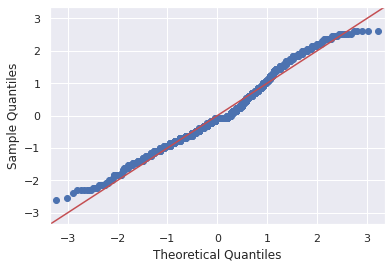

In [ ]:
sm.qqplot(sc_wine['fixed acidity'], line='45')
pylab.show()

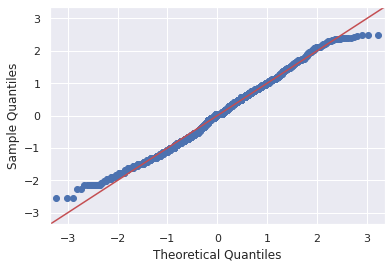

In [ ]:
sm.qqplot(sc_wine['volatile acidity'], line='45')
pylab.show()

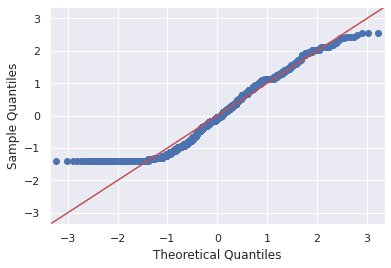

In [ ]:
sm.qqplot(sc_wine['citric acid'], line='45')
pylab.show()

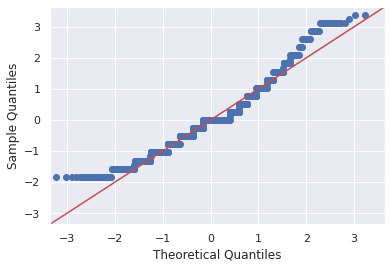

In [ ]:
sm.qqplot(sc_wine['residual sugar'], line='45')
pylab.show()

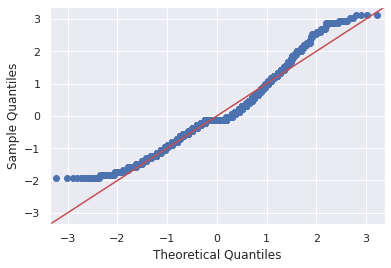

In [ ]:
sm.qqplot(sc_wine['chlorides'], line='45')
pylab.show()

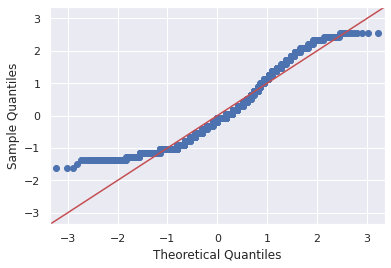

In [ ]:
sm.qqplot(sc_wine['free sulfur dioxide'], line='45')
pylab.show()

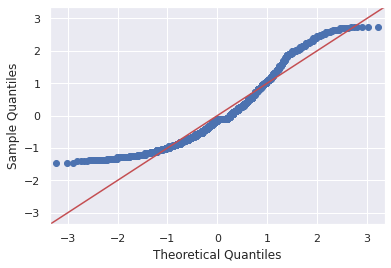

In [ ]:
sm.qqplot(sc_wine['total sulfur dioxide'], line='45')
pylab.show()

<function matplotlib.pyplot.show>

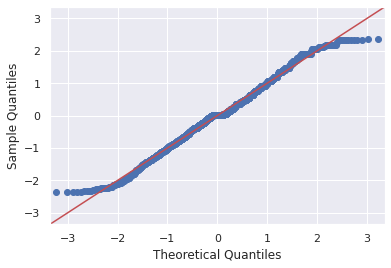

In [ ]:
sm.qqplot(sc_wine['density'], line='45')
pylab.show

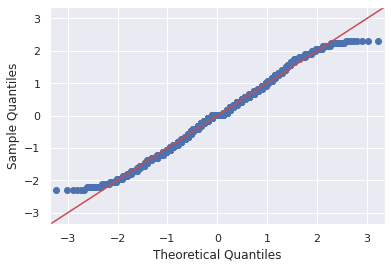

In [ ]:
sm.qqplot(sc_wine['pH'], line='45')
pylab.show()

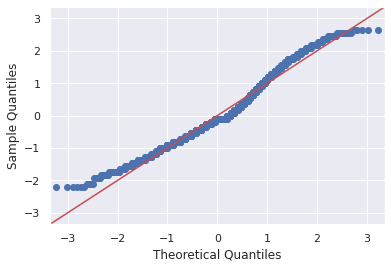

In [ ]:
sm.qqplot(sc_wine['sulphates'], line='45')
pylab.show()

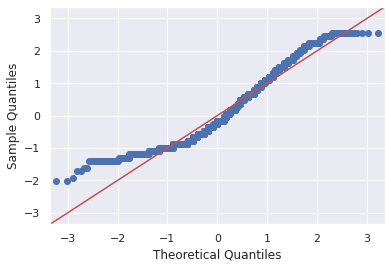

In [ ]:
sm.qqplot(sc_wine['alcohol'], line='45')
pylab.show()

Com podem veure en els diferents QQ-plots, hem aconseguit amb l'ajust que una gran part de les dades segueixi la recta. Per tant, podriem concloure que s'ha fet una millora de la normalitat. No obstant això, és evident que per a garantir la normalitat de la variable, cap de les gràfiques hauria de tenir forma de "S".

Podem repetir el test de Kolmogorov-Smirnov per a veure què ha passat amb el dataset transformat.

In [ ]:
for i in sc_wine:
  KS = stats.kstest(sc_wine[i], 'norm', N = sc_wine.shape[0])
  print("El pvalue de la variable", i, "és:", KS[1])
  if KS[1] >= 0.05:
    print("S'accepta la normalitat de la variable")
  else:
    print("No s'accepta la normalitat de la variable.\n")

El pvalue de la variable fixed acidity és: 9.146532416400654e-18
No s'accepta la normalitat de la variable.

El pvalue de la variable volatile acidity és: 0.00048033532171355735
No s'accepta la normalitat de la variable.

El pvalue de la variable citric acid és: 2.23875185828985e-10
No s'accepta la normalitat de la variable.

El pvalue de la variable residual sugar és: 2.654309391136602e-34
No s'accepta la normalitat de la variable.

El pvalue de la variable chlorides és: 6.3153115928274965e-25
No s'accepta la normalitat de la variable.

El pvalue de la variable free sulfur dioxide és: 2.6622281899538378e-14
No s'accepta la normalitat de la variable.

El pvalue de la variable total sulfur dioxide és: 1.2744955708372847e-21
No s'accepta la normalitat de la variable.

El pvalue de la variable density és: 0.001277129764156044
No s'accepta la normalitat de la variable.

El pvalue de la variable pH és: 0.0015491526858316528
No s'accepta la normalitat de la variable.

El pvalue de la variabl

**TOT I QUE ELS CONTRASTOS D'HIPÒTESIS DEMOSTREN QUE NO SEGUIM UNA DISTRIBUCIÓ NORMAL, DONAT QUE LES MOSTRES SÓN SUFICIENTMENT GRANS (1599 > 50), I D'ACORD AMB EL TEOREMA DEL LÍMIT CENTRAL, PODEM CONSIDERAR QUE LES DADES SEGUEIXEN UNA DISTRIBUCIÓ NORMAL**

## 4.2 Estudi en funció de la variable objectiu

Per a realitzar l'anàlisi, primer analitzarem el conjunt de tipus de qualitat de vins, i finalment, obtindrem els segments de qualitats i els analitzarem un a un.

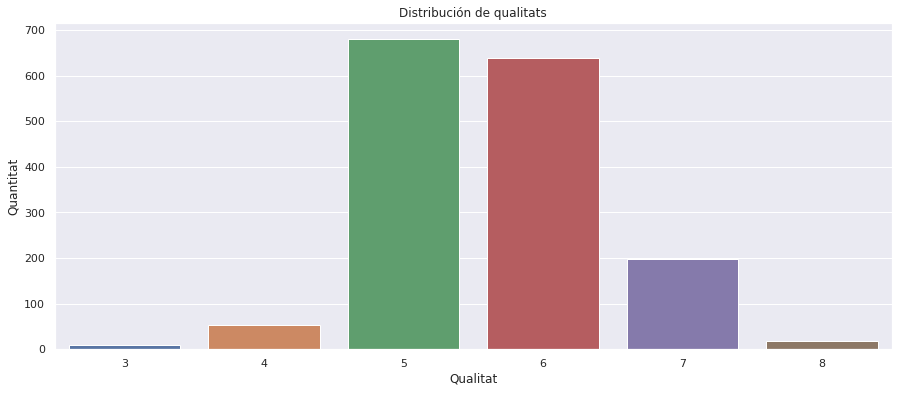

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x=wine['quality'], data=wine)
plt.title("Distribución de qualitats")
plt.ylabel("Quantitat")
plt.xlabel("Qualitat")
plt.show()

Com hem comentat anteriorment, el nostre dataset precissament conté una gran quantitat de mostres per les puntuacions de 5 i 6 en qualitat. Per tant, a causa de la naturalesa de les dades disponibles, el model estarà molt més preparat per predir vins en aquest rang de qualitat, que per sobre (vins d'alta qualitat) o per sota (vins de baixa qualitat).

Serà interessant en aquest punt, estudiar les correlacions entre les variables, per poder determinar quines tenen més pes sobre la qualitat.

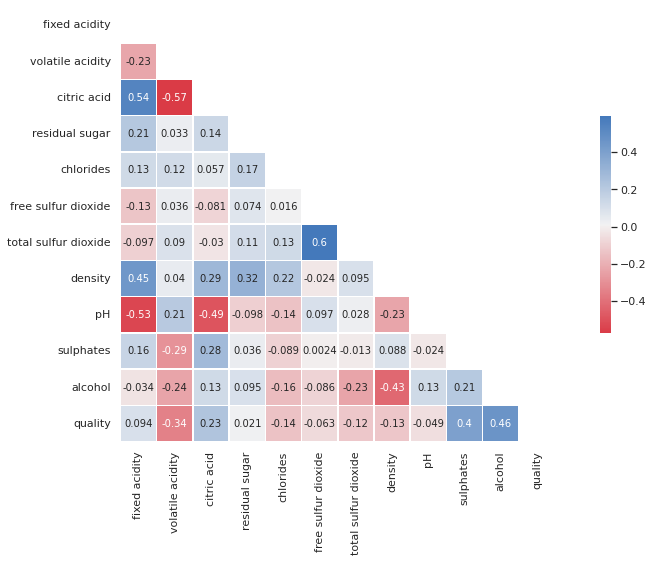

In [ ]:
correl = wine.corr()

mask = np.triu(np.ones_like(correl, dtype=bool))
cmap = sns.diverging_palette(10, 250, as_cmap = True)

plt.figure(figsize=(16,8))
sns.set_style(style='white')
sns.heatmap(correl, annot=True, annot_kws = {"size": 10}, cbar_kws={"shrink": .5}, mask = mask, square = True, cmap = cmap, linewidths=.5)
plt.show()

A continuació, el que anem a realitzar és la comprobació de l'homoscedasticitat, **i com hem considerat, d'acord amb el Teorema del Límit Central**, que les variables segueixen una distribució normal, entenem que podem realitzar contrastos paramètrics, com el test de Levene.

Podem analitzar a continuació les relacions entre variables independents i com s'afecten unes a les altres:
<ul>
  <li>Relacions fortes:
    <ul>
      <li>free sulfur dioxide ~ total sulfur dioxide</li>
      <li>citric acid ~ fixed acidity</li>
      <li>citric acid ~ volatile acidity</li>
      <li>pH ~ fixed acidity</li>
      <li>pH ~ citric acid</li>
      <li>density ~ fixed acidity</li>
      <li>density ~ alcohol</li>
    </ul>
  </li>
</ul>

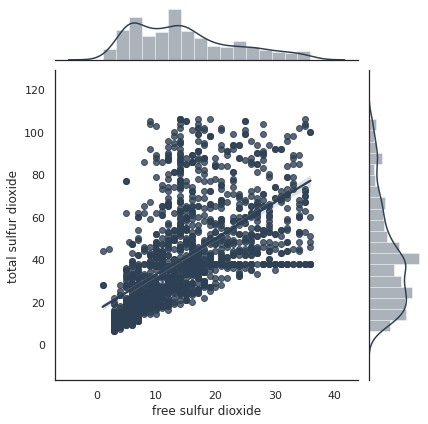

In [ ]:
a = sns.JointGrid(x='free sulfur dioxide', y='total sulfur dioxide', data=wine)
a = a.plot_joint(sns.regplot, color='#2e4053')
a = a.plot_marginals(sns.distplot, color='#2e4053')

In [ ]:
stats.levene(wine['free sulfur dioxide'], wine['total sulfur dioxide'])

LeveneResult(statistic=884.0648633751215, pvalue=9.927739974150213e-172)

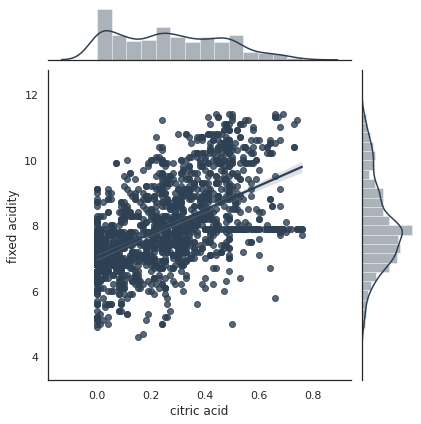

In [ ]:
b = sns.JointGrid(x='citric acid', y='fixed acidity', data=wine)
b = b.plot_joint(sns.regplot, color='#2e4053')
b = b.plot_marginals(sns.distplot, color='#2e4053')

In [ ]:
stats.levene(wine['citric acid'], wine['fixed acidity'])

LeveneResult(statistic=1617.9106817902843, pvalue=1.3058018806065263e-286)

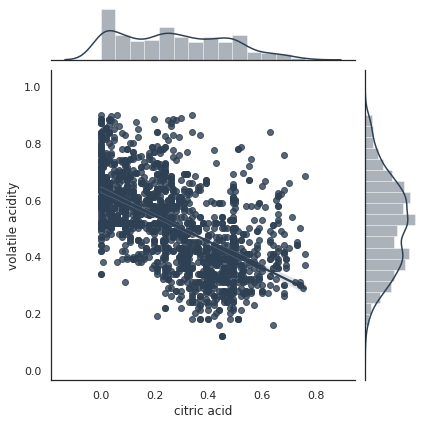

In [ ]:
c = sns.JointGrid(x='citric acid', y='volatile acidity', data=wine)
c = c.plot_joint(sns.regplot, color='#2e4053')
c = c.plot_marginals(sns.distplot, color='#2e4053')

In [ ]:
stats.levene(wine['citric acid'], wine['volatile acidity'])

LeveneResult(statistic=107.60468141605777, pvalue=8.089399330508615e-25)

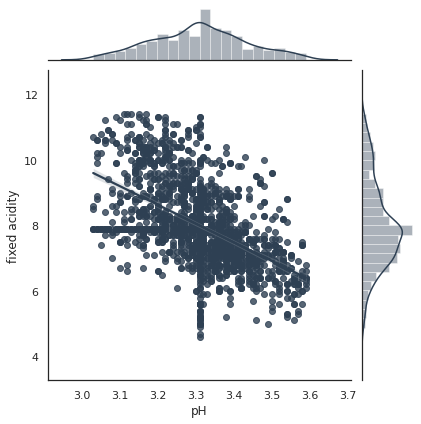

In [ ]:
d = sns.JointGrid(x='pH', y='fixed acidity', data=wine)
d = d.plot_joint(sns.regplot, color='#2e4053')
d = d.plot_marginals(sns.distplot, color='#2e4053')

In [ ]:
stats.levene(wine['pH'], wine['fixed acidity'])

LeveneResult(statistic=1897.8085783705062, pvalue=0.0)

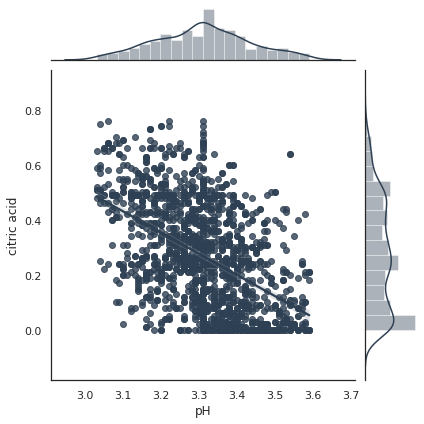

In [ ]:
e = sns.JointGrid(x='pH', y='citric acid', data=wine)
e = e.plot_joint(sns.regplot, color='#2e4053')
e = e.plot_marginals(sns.distplot, color='#2e4053')

In [ ]:
stats.levene(wine['pH'], wine['citric acid'])

LeveneResult(statistic=436.41014179081657, pvalue=6.011263413228681e-91)

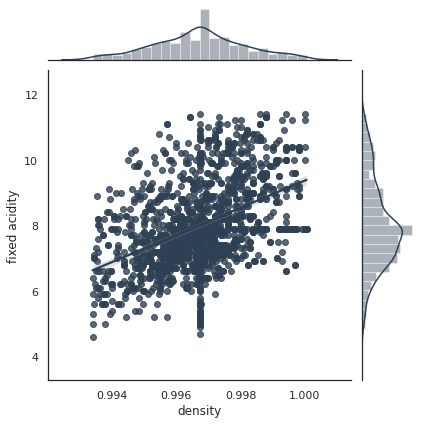

In [ ]:
f = sns.JointGrid(x='density', y='fixed acidity', data=wine)
f = f.plot_joint(sns.regplot, color='#2e4053')
f = f.plot_marginals(sns.distplot, color='#2e4053')

In [ ]:
stats.levene(wine['density'], wine['fixed acidity'])

LeveneResult(statistic=2333.182901139298, pvalue=0.0)

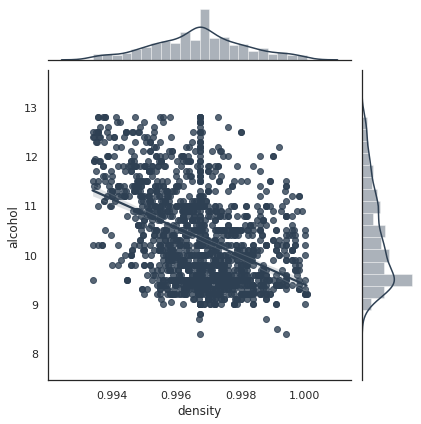

In [ ]:
g = sns.JointGrid(x='density', y='alcohol', data=wine)
g = g.plot_joint(sns.regplot, color='#2e4053')
g = g.plot_marginals(sns.distplot, color='#2e4053')

In [ ]:
stats.levene(wine['density'], wine['alcohol'])

LeveneResult(statistic=3014.6133776970582, pvalue=0.0)

Com observem a les gràfiques anteriors, les correlacions es van apropant a 0, i per això les dades estan més disperses, però a les primeres gràfiques si que podem apreciar la gran correlació que hi ha entre variables.

A mesura que hem anat analitzant les correlacions entre variables, hem anat fent el test de Levene, per comprobar l'homoscedasticitat dels parells de variables.
<br /><br />En cap parell de variables s'observa una variancia estadísticament igual.

Podem ordenar també la importància de les variables, i com afecta a la variable depenent a través de la següent comanda:

In [ ]:
wine.corr()[['quality']].sort_values(by='quality', ascending = False)

,quality
quality,1.000000
alcohol,0.458918
sulphates,0.403158
citric acid,0.233832
fixed acidity,0.094323
residual sugar,0.021353
pH,-0.048534
free sulfur dioxide,-0.063221
total sulfur dioxide,-0.123117
density,-0.126848


Com observem, a la variable *quality* li afecten les variables de forma diversa:
<ul>
  <li>Les variables que aporten unes correlacions positives són:
    <ul>
      <li>Alcohol,</li>
      <li>sulfats, i</li>
      <li>àcid cítric,</li>
    </ul>
  </li>
  <li>Les variables que aporten unes correlacions negatives són:
    <ul>
      <li>Acidessa volàtil,</li>
      <li>clorurs,</li>
      <li>densitat, i</li>
      <li>el total de diòxid de sulfurs</li>
    </ul>
  </li>
</ul>

Aquestes variables afecten tant positivament com negativament a la variable *quality*.

In [ ]:
q3 = wine[wine['quality'] == 3]
q4 = wine[wine['quality'] == 4]
q5 = wine[wine['quality'] == 5]
q6 = wine[wine['quality'] == 6]
q7 = wine[wine['quality'] == 7]
q8 = wine[wine['quality'] == 8]

In [ ]:
def quality_segment(segment, df, n):
    """
    Funció de proporció de la qualitat.
    q -> es el DataFrame de la qualitat
    df -> es el dataframe total
    n -> es el numero del segment a analizar
    """
    print("La proporció del segment {} respecte del total de qualitats es del {} %"
          .format(n, round((len(segment)/len(df))*100, 2)))

In [ ]:
quality_segment(q3, wine, 3)
quality_segment(q4, wine, 4)
quality_segment(q5, wine, 5)
quality_segment(q6, wine, 6)
quality_segment(q7, wine, 7)
quality_segment(q8, wine, 8)

La proporció del segment 3 respecte del total de qualitats es del 0.63 %
La proporció del segment 4 respecte del total de qualitats es del 3.31 %
La proporció del segment 5 respecte del total de qualitats es del 42.59 %
La proporció del segment 6 respecte del total de qualitats es del 39.9 %
La proporció del segment 7 respecte del total de qualitats es del 12.45 %
La proporció del segment 8 respecte del total de qualitats es del 1.13 %


Com podem observar, les qualitats que més predominen en el mercat de vins vermells són els classificats com qualitat 5, amb un 42.59%, qualitat 6, amb un 39.9%, i qualitat 7, amb un 12.45%.

Ara, anem a analitzar-ho per qualitat, a veure si les variables tenen variacions que es puguin apreciar amb un violinplot:

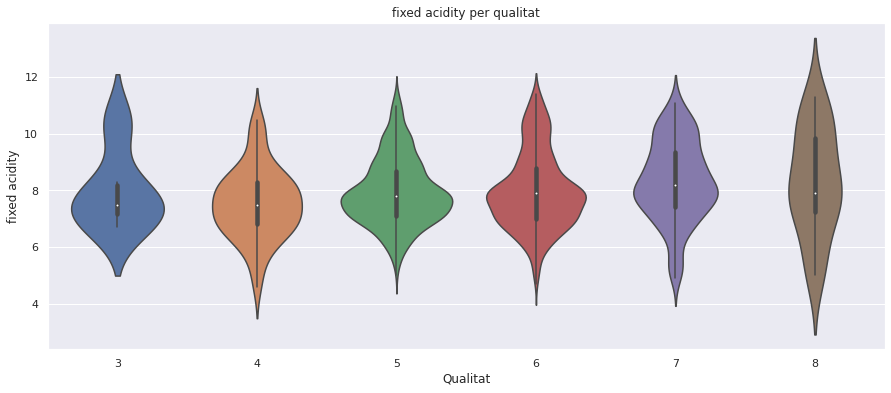

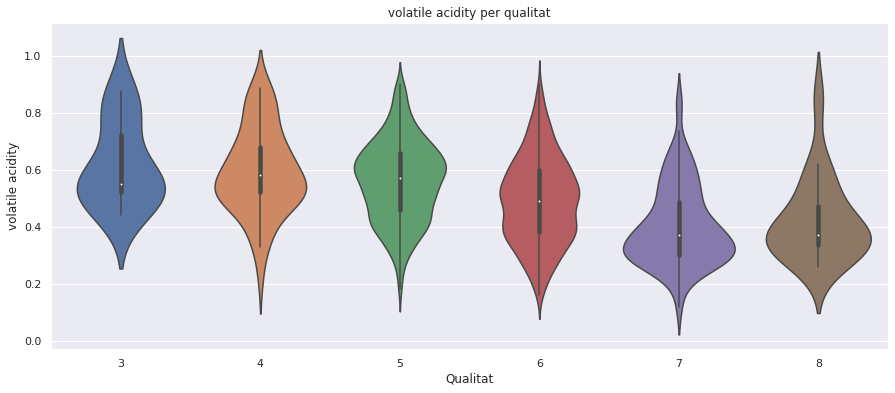

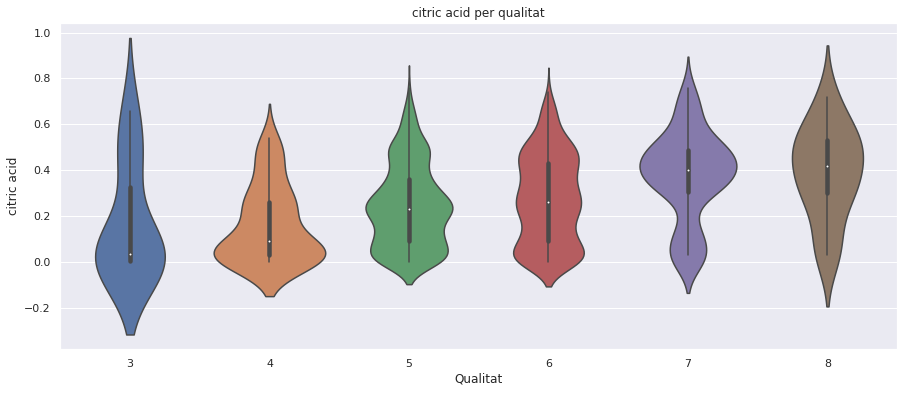

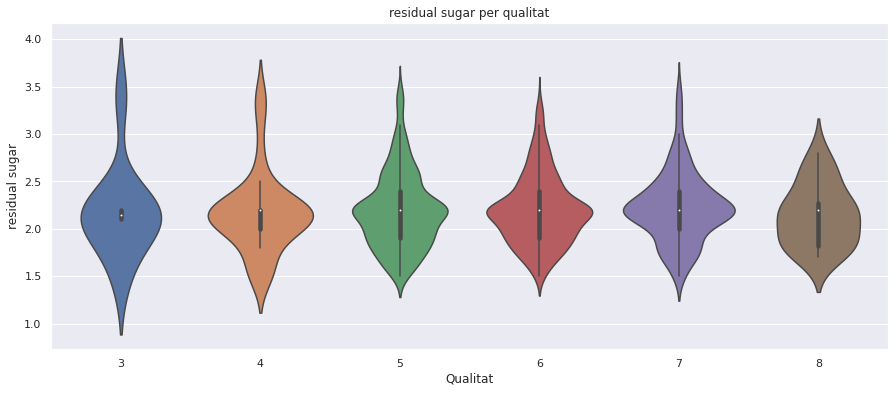

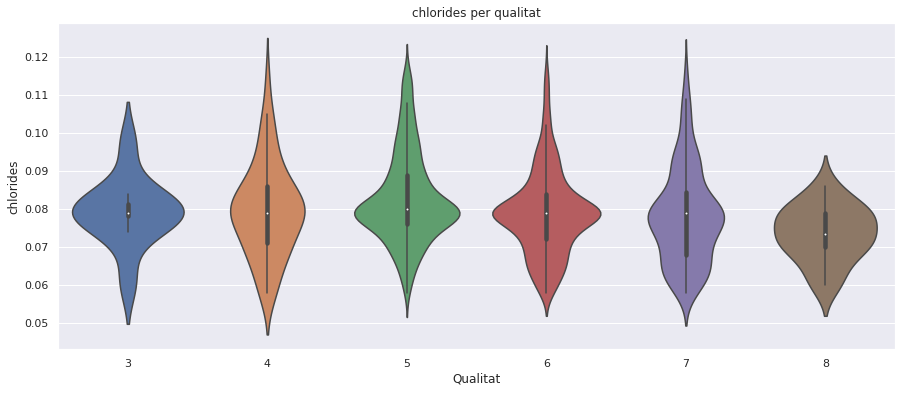

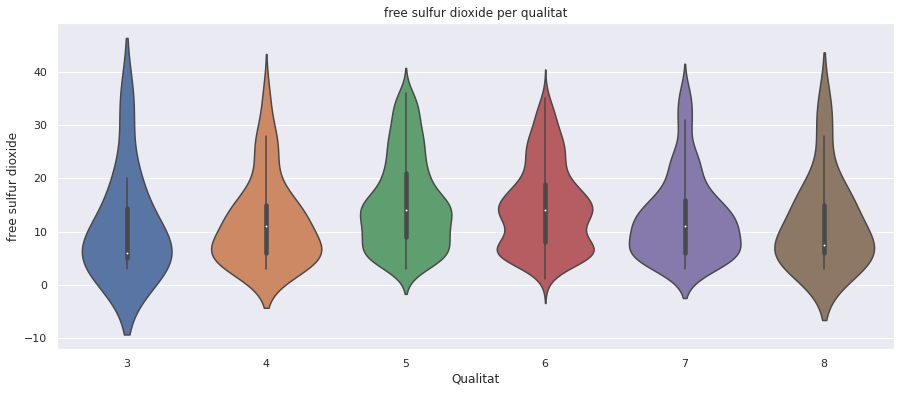

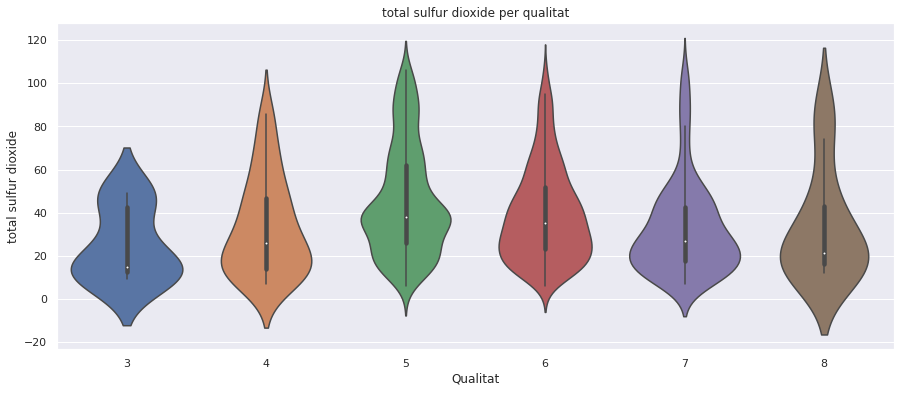

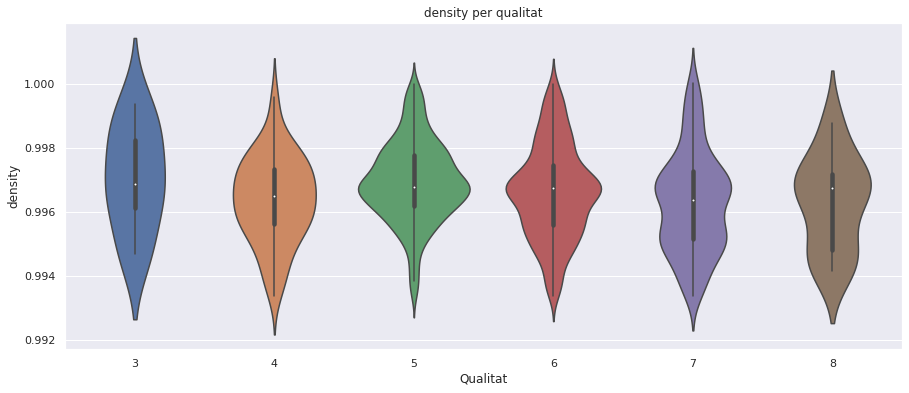

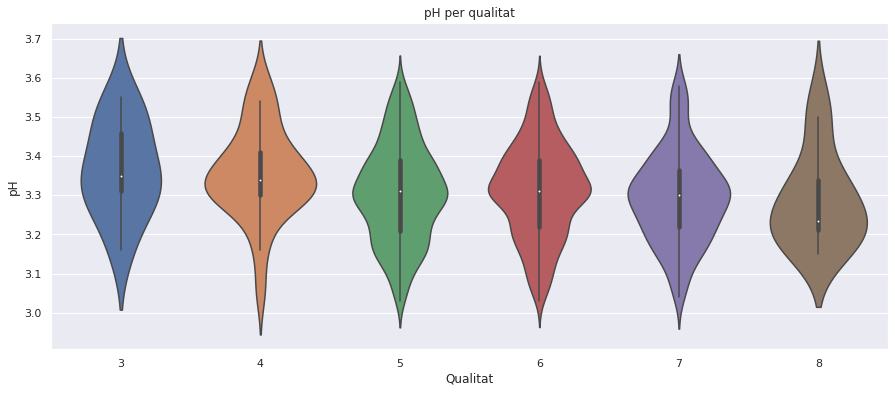

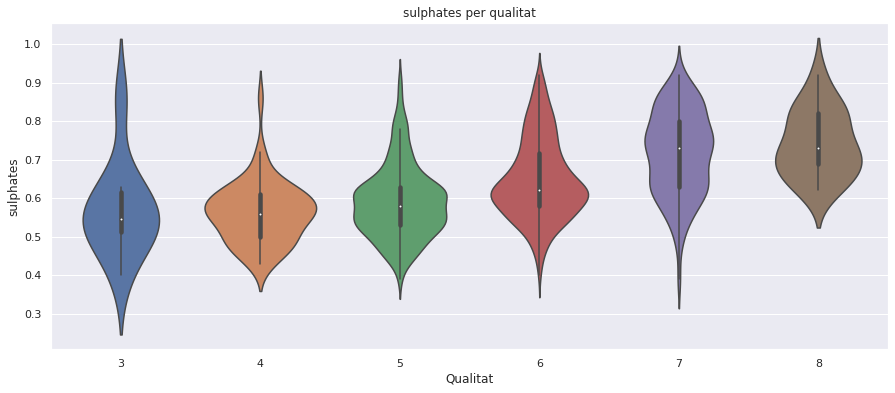

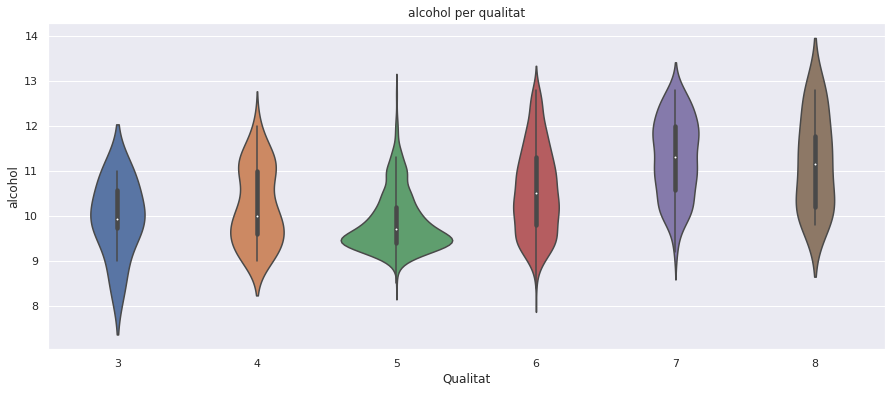

In [ ]:
for i in wine:
  if i != 'quality':
    plt.figure(figsize=(15, 6))
    sns.set_theme(style="darkgrid")
    ax = sns.violinplot(x=wine['quality'], y=wine[i])
    plt.title(i + " per qualitat")
    ax.set_xlabel("Qualitat")
    ax.set_ylabel(i)
    plt.show()

Analitzant els violinplot trobem les següents diferències entre qualitats i les variables (mostrem les que les diferències siguin més grans).
<ul>
  <li>Variable <i>volatile acidity</i>:
    <ul>
      <li>Tendència baixista a mesura que incrementa la qualitat</li>
    </ul>
  </li>
  <li>Variable <i>citric acid</i>:
    <ul>
      <li>Incrementa amb la qualitat, és a dir, quan més qualitat té el vi, més acid citric conté.</li>
    </ul>
  </li>
  <li>Variable <i>clorhides</i>:
    <ul>
      <li>Incrementa a través que incrementa la qualitat</li>
    </ul>
  </li>
  <li>Variable <i>free sulfur dioxide & total sulfur dioxide</i>:
    <ul>
      <li>Té un comportament extrany donat que té una tendència positiva fins la qualitat 5 i 6, i a partir d'aquest rang, fins a la qualitat 8, disminueix.</li>
    </ul>
  </li>
  <li>Variable <i>pH</i>:
    <ul>
      <li>Tendència baixista a mesura que incrementa la qualitat</li>
    </ul>
  </li>
  <li>Variable <i>Sulfat</i>:
    <ul>
      <li>Tendència alcista a mesura que incrementa la qualitat</li>
    </ul>
  </li>
  <li>Variable <i>Alcohol</i>:
    <ul>
      <li>Tendència alcista a mesura que incrementa la qualitat</li>
    </ul>
  </li>
</ul>

En el següent anàlisi agruparem dades de l'output per poder categoritzar-lo. Per els valors que siguin 3 i 4, el valor serà *baixa_qual*; si els valors són 5 i 6, el valor serà *qual_mitja*; finalment, si els valors són 7 i 8, el valor serà *alta_qual*.

In [ ]:
for idx, i in enumerate(wine['quality']):
  if (i == 3 or i == 4):
    wine['quality'][idx] = 'baixa_qual'
  elif (i == 5 or i == 6):
    wine['quality'][idx] = 'qual_mitja'
  else:
    wine['quality'][idx] = 'alta_qual'

In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,qual_mitja
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,qual_mitja
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,qual_mitja
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,qual_mitja
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,qual_mitja


In [ ]:
baixa = wine[wine['quality'] == 'baixa_qual']
mitja = wine[wine['quality'] == 'qual_mitja']
alta = wine[wine['quality'] == 'alta_qual']

In [ ]:
quality_segment(baixa, wine, 'baixa qualitat')
quality_segment(mitja, wine, 'qualitat mitjana')
quality_segment(alta, wine, 'alta qualitat')

La proporció del segment baixa qualitat respecte del total de qualitats es del 3.94 %
La proporció del segment qualitat mitjana respecte del total de qualitats es del 82.49 %
La proporció del segment alta qualitat respecte del total de qualitats es del 13.57 %


In [ ]:
wine.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,qual_mitja
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,qual_mitja
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,qual_mitja
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,qual_mitja
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,qual_mitja
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,qual_mitja
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,qual_mitja
7,7.3,0.65,0.00,2.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,alta_qual


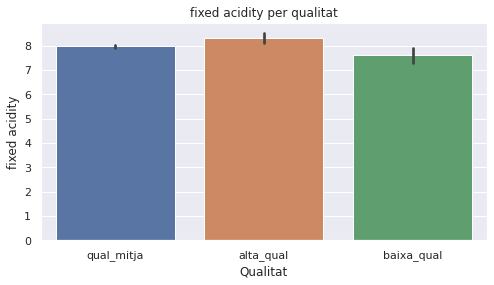

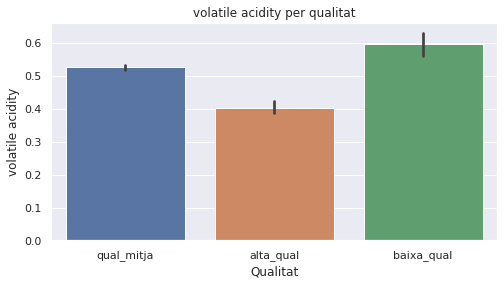

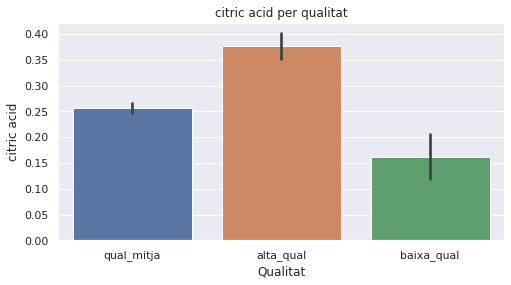

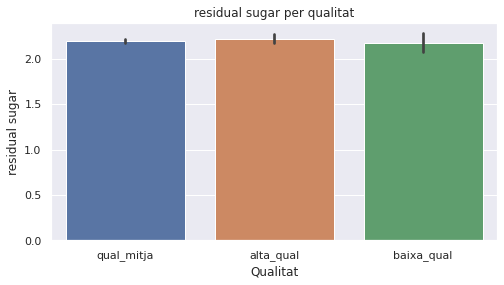

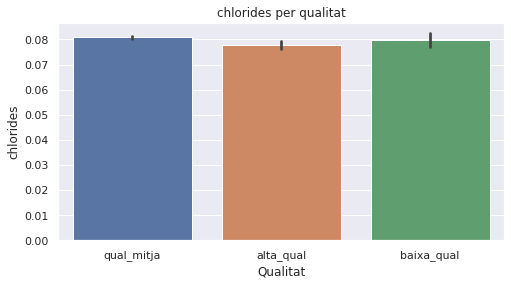

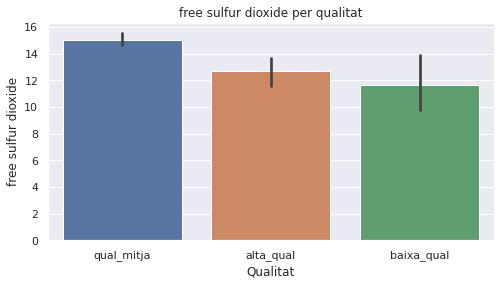

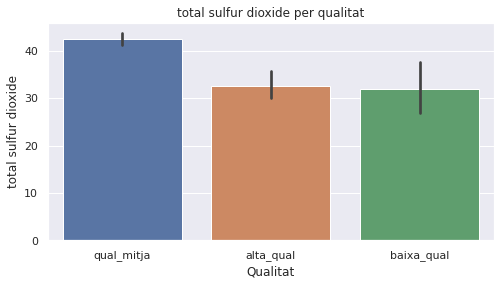

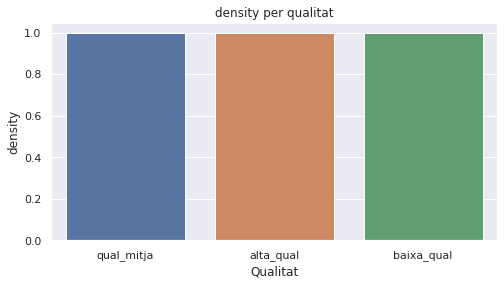

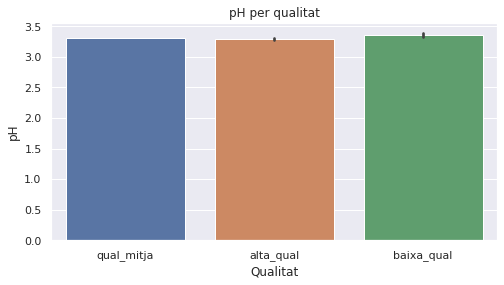

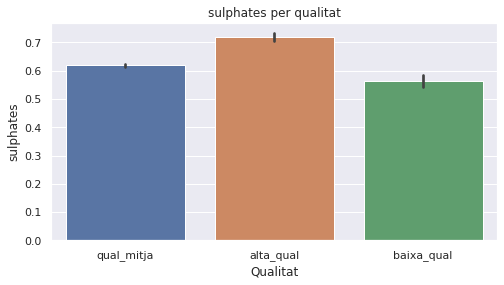

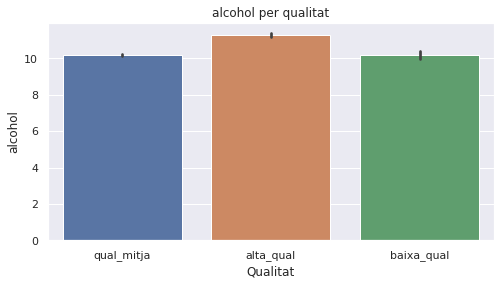

In [ ]:
for i in wine:
  if i != 'quality':
    plt.figure(figsize=(8, 4))
    sns.set_theme(style="darkgrid")
    ax = sns.barplot(x=wine['quality'], y=wine[i])
    plt.title(i + " per qualitat")
    ax.set_xlabel("Qualitat")
    ax.set_ylabel(i)
    plt.show()

Ja amb aquests gràfics el que decidim és quines característiques tenen els vins d'alta qualitat:


*   Tenen més *fixed acidity*, al contrari de *volatile acidity*;
*   Tenen més *citric acid*, el doble que els vins de baixa qualitat, i un 30% més que els vins de qualitat mitjana;
*   Tant en la variable *free sulfur dioxide* i *total sulfur dioxide* té un comportament peculiar, ja que els valors són gairebé idèntics als valors de vins de baixa qualitat.
*    Finalment, tant *sulfats* com *alcohol*, els vins d'alta qualitat sobrepasen els valors dels vins de baixa i mitja qualitat.



# 5. PREDICCIÓ

Com en aquest punt ja tenim la variable *quality* categoritzada, aprofitem i anem a realitzar unes prediccions.

In [ ]:
# Volem també analitzar el poder predictiu de l'anàlisi, llavors volem el df original

df_wine = pd.read_csv("winequality-red.csv")

Separem en set d'entrenament i set de test.

In [ ]:
X_cat = wine.drop(columns = 'quality')
X_num = df_wine.drop(columns = 'quality')

y_cat = wine['quality']
y_num = df_wine['quality']

In [ ]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_cat, y_cat, test_size = 0.2)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_num, y_num, test_size = 0.2)

Primer anem a realitzar un random forest.

In [ ]:
rf_cat = RandomForestClassifier()
rf_cat.fit(X_train_0, y_train_0)

RandomForestClassifier()

In [ ]:
y_pred_cat = rf_cat.predict(X_test_0)

In [ ]:
from sklearn import metrics

In [ ]:
print('Accuracy: ', metrics.accuracy_score(y_test_0,y_pred_cat))

Accuracy:  0.884375


In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_1, y_train_1)

RandomForestRegressor()

In [ ]:
y_pred_reg = rf_reg.predict(X_test_1)

In [ ]:
from sklearn.metrics import r2_score

print('R2: ', r2_score(y_test_1, y_pred_reg))

R2:  0.44052348574636635


Com observem, la classificació es realitza millor quan tenim categories per classificar, amb un accuracy del 87% aproximadament versus un R2 del 44%, és a dir, molt pobre en prediccions de regressió a través del random forest regressor.

Anem a realitzar una Xarxa Neuronal per veure si millorem la classificació.

In [ ]:
y_transform = pd.get_dummies(y_cat)

In [ ]:
from sklearn import preprocessing

X_norm_cat = preprocessing.normalize(X_cat, axis = 0)
X_norm_num = preprocessing.normalize(X_num, axis = 0)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_norm_cat, y_transform, test_size = 0.2)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_norm_num, y_num, test_size = 0.2)

In [ ]:
y_test_2

,alta_qual,baixa_qual,qual_mitja
786,0,0,1
235,0,0,1
967,0,0,1
744,0,0,1
789,0,0,1
...,...,...,...
1063,0,0,1
247,0,0,1
1374,0,1,0
178,0,0,1


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

model = keras.models.Sequential()
model.add(Dense(11, input_shape=(X_train_2.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

TensorFlow version: 2.8.0


In [ ]:
best_model = model.fit(X_train_2, y_train_2, epochs=200, batch_size=32, verbose=1, validation_data = (X_test_2, y_test_2))

Epoch 1/200
40/40 [==============================] - 1s 8ms/step - loss: 0.6653 - accuracy: 0.8210 - val_loss: 0.5114 - val_accuracy: 0.8406
Epoch 2/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5725 - accuracy: 0.8210 - val_loss: 0.5113 - val_accuracy: 0.8406
Epoch 3/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5692 - accuracy: 0.8210 - val_loss: 0.5145 - val_accuracy: 0.8406
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.8210 - val_loss: 0.5084 - val_accuracy: 0.8406
Epoch 5/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5733 - accuracy: 0.8210 - val_loss: 0.5118 - val_accuracy: 0.8406
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.8210 - val_loss: 0.5219 - val_accuracy: 0.8406
Epoch 7/200
40/40 [==============================] - 0s 3ms/step - loss: 0.5656 - accuracy: 0.8210 - val_loss: 0.4991 - val_accuracy: 0.8406
Epoch 8/200
4

In [ ]:
pred = model.evaluate(x = X_test_2, y = y_test_2)
print("Loss:", pred[0], "\nAccuracy:", pred[1])

10/10 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8656
Loss: 0.4028633236885071 
Accuracy: 0.8656250238418579
